In [54]:
import julia
from julia import Main

julia.install()



#Julia Implementation of RBF Kernel


In [39]:
Main.eval("""
using KernelFunctions
function rbf_julia(X, Y, length_scale)
    kernel = ScaledKernel(SqExponentialKernel(), 1.0 / length_scale)
    return kernelmatrix(kernel, X', Y')
end
""")


<PyCall.jlwrap rbf_julia>

The RBFKernel() function from the KernelFunctions.jl package in Julia computes the RBF kernel between all pairs of columns in X and Y using the formula:
$$
k(x, y) = \exp\left(-\frac{||x - y||^2}{2}\right)
$$

The RBF class from sklearn.gaussian_process.kernels computes the RBF kernel between all pairs of rows in X and Y using the formula:
$$
k(x, y) = \exp\left(-\frac{||x - y||^2}{2l^2}\right)
$$

The rbf_kernel function from sklearn.metrics.pairwise computes the RBF kernel between two sets of samples X and Y using the formula:
$$
k(x, y) = \exp\left(-\gamma ||x - y||^2\right)
$$



In [40]:
from sklearn.metrics.pairwise import rbf_kernel as RBF_PW

# Use the rbf_kernel function from sklearn.metrics.pairwise
def rbf_pw(X, Y=None, length_scale=1.0):
    gamma = 1.0 / (2 * length_scale ** 2)
    return RBF_PW(X, Y, gamma=gamma)

In [48]:
import random
import numpy as np
random.seed(1234)
predictions = np.array([random.random() for _ in range(100)]).reshape(-1,1)
outcomes = np.array([bool(random.getrandbits(1)) for _ in range(100)]).reshape((-1,1))

In [52]:
# Generate some sample data
X = np.random.rand(10, 2)
Y = np.random.rand(10, 2)

#X = np.array([0.9,0.9])
#Y = np.array([True,True])

predictions = np.array([[0.9,0.1], [0.9,0.1]])
outcomes = np.array([[1.0,0.0], [1.0, 0.0]], dtype=np.float64)

# Compute the RBF kernel using the three functions
K_pw = rbf_pw(predictions, outcomes)
K_julia = Main.rbf_julia(predictions, outcomes, 1.0)

# Compare the results
print("RBF_PW:", K_pw)
print("RBF_Julia:", K_julia)


RBF_PW: [[0.99004983 0.99004983]
 [0.99004983 0.99004983]]
RBF_Julia: [[0.99004983 0.99004983]
 [0.99004983 0.99004983]]


In [53]:
# Compute the mean absolute difference between the kernel matrices
mad_pw_julia = np.mean(np.abs(K_pw - K_julia))

print("Mean Absolute Difference between RBF_PW and RBF_Julia:", mad_pw_julia)

# Compute the mean squared difference between the kernel matrices
msd_pw_julia = np.mean((K_pw - K_julia) ** 2)

print("Mean Squared Difference between RBF_PW and RBF_Julia:", msd_pw_julia)


Mean Absolute Difference between RBF_PW and RBF_Julia: 0.0
Mean Squared Difference between RBF_PW and RBF_Julia: 0.0


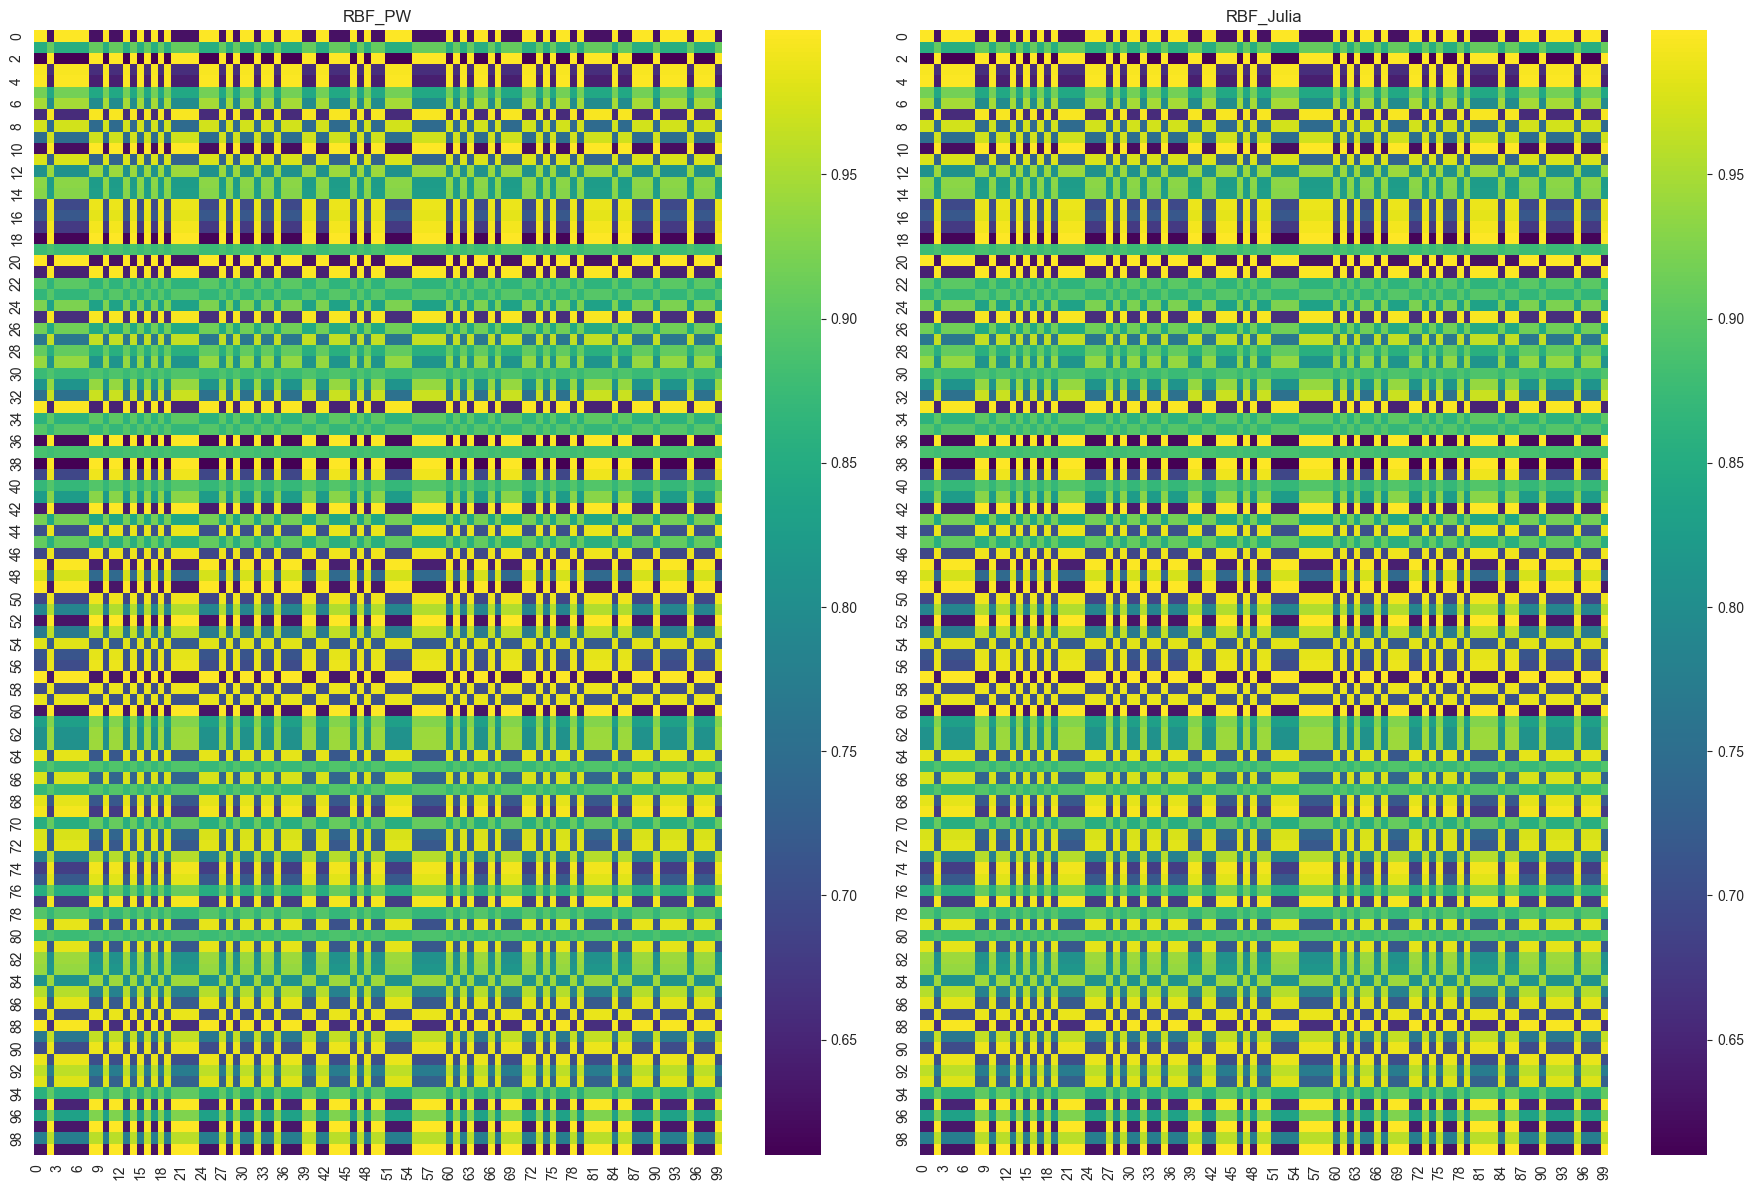

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 12))


sns.heatmap(K_pw, ax=axs[ 0], cmap='viridis')
axs[ 0].set_title('RBF_PW')

sns.heatmap(K_julia, ax=axs[ 1], cmap='viridis')
axs[ 1].set_title('RBF_Julia')


#sns.heatmap(np.abs(K_pw - K_julia), ax=axs[ 2], cmap='viridis')
#axs[ 2].set_title('Absolute Difference between RBF_PW and RBF_Julia')

# Show the figure
plt.tight_layout()
plt.show()


#Compare Linear Kernels in Julia vs. Python

In [44]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.gaussian_process.kernels import DotProduct

# sklearn.metrics.pairwise
linear_pw = linear_kernel

# sklearn.gaussian_process.kernels
linear_gp = DotProduct()

K_julia = Main.linear_julia(X, Y)


AttributeError: linear_julia

In [ ]:
Main.eval("""
using KernelFunctions
linear_julia = LinearKernel()

function apply_linear_kernel(X, Y)
    return kernelmatrix(linear_julia, X', Y')
end
""")


The LinearKernel() function from the KernelFunctions.jl package in Julia computes the Linear kernel between all pairs of columns in X and Y using the formula:

$$
k(x, y; c) = x^T y + c
$$



The DotProduct class from sklearn.gaussian_process.kernels computes the Linear kernel between all pairs of rows in X and Y using the formula:

$$
k(x, y) = (x \cdot y + c)^d
$$



The linear_kernel function from sklearn.metrics.pairwise computes the Linear kernel between two sets of samples X and Y using the formula:

$$
k(x, y) = x^T y
$$


In these formulas, x and y are the input vectors.

In [ ]:
from pycalibration import ca

# Compute the kernel matrices
K_pw = linear_pw(X, Y)
K_gp = linear_gp(X, Y)
K_julia = Main.apply_linear_kernel(X, Y)


# Compute the mean absolute difference and mean squared difference
mad_pw_gp = np.mean(np.abs(K_pw - K_gp))
msd_pw_gp = np.mean((K_pw - K_gp) ** 2)
mad_pw_julia = np.mean(np.abs(K_pw - K_julia))
msd_pw_julia = np.mean((K_pw - K_julia) ** 2)

print(f"Mean absolute difference between sklearn.metrics.pairwise and sklearn.gaussian_process.kernels: {mad_pw_gp}")
print(f"Mean squared difference between sklearn.metrics.pairwise and sklearn.gaussian_process.kernels: {msd_pw_gp}")
print(f"Mean absolute difference between sklearn.metrics.pairwise and Julia: {mad_pw_julia}")
print(f"Mean squared difference between sklearn.metrics.pairwise and Julia: {msd_pw_julia}")


In [ ]:
# Compute the kernel matrices
K_pw = linear_pw(X, Y)
K_gp = linear_gp(X, Y)
K_julia = Main.apply_linear_kernel(X, Y)

# Create a figure with 3 subplots
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Create a heatmap for the kernel matrix computed by linear_pw
sns.heatmap(K_pw, ax=axs[0], cmap='viridis')
axs[0].set_title('linear_pw')

# Create a heatmap for the kernel matrix computed by linear_gp
sns.heatmap(K_gp, ax=axs[1], cmap='viridis')
axs[1].set_title('linear_gp')

# Create a heatmap for the kernel matrix computed by linear_julia
sns.heatmap(K_julia, ax=axs[2], cmap='viridis')
axs[2].set_title('linear_julia')

# Display the figure
plt.show()